#### In this notebook, I demonstrate web scraping techniques to extract company reviews and details from [Ambitionbox.com](https://www.ambitionbox.com/list-of-companies?page=1). Using Python and BeautifulSoup, we'll gather valuable insights and data to create a dataset.

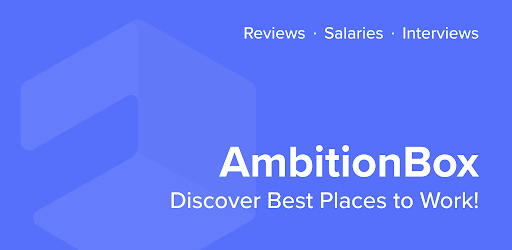   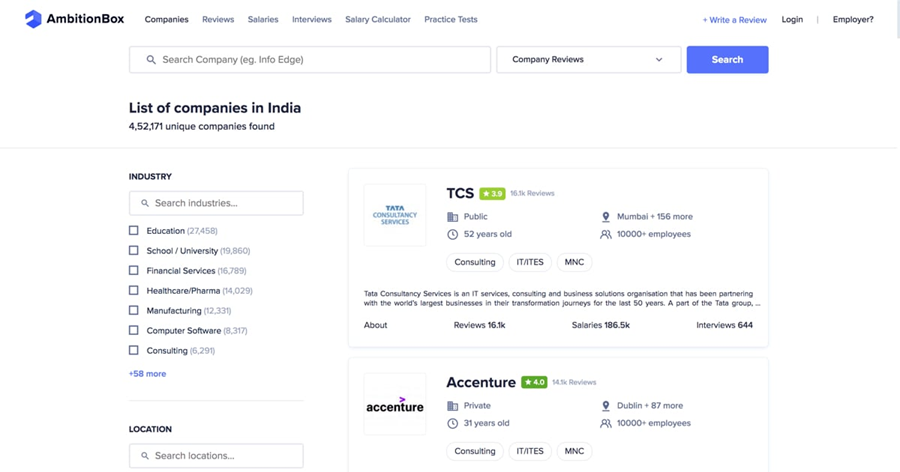

In [1]:
#importing dependcies
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import requests

## if response code comes out to be 403, use below

#### When performing web scraping, it is important to mimic the behavior of a legitimate browser to avoid being blocked by the target website. 
#### The below code snippet provides a custom User-Agent header in the HTTP request, which serves this purpose making scraping scripts more robust and likely to succeed in retrieving the desired web content.

In [2]:
for j in range(1,2):
    url ='https://www.ambitionbox.com/list-of-companies?page={}'.format(j)

    headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    webpage=requests.get(url ,headers=headers).text

In [3]:
soup=BeautifulSoup(webpage,'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <style>
   @media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}
  </style>
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date),window.initialDate=(new Date).toISOString()
  </script>
  <script type="text/partytown">
   window.dataLayer = window.dataLayer || [];
      window.gtag = function() {
      	window.dataLayer.push(arguments);
      };
      gtag('js', new Date(window.initialDate));
  </script>
  <title>
   List of companies in India | AmbitionBox
  </title>
  <meta content="2024 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-he
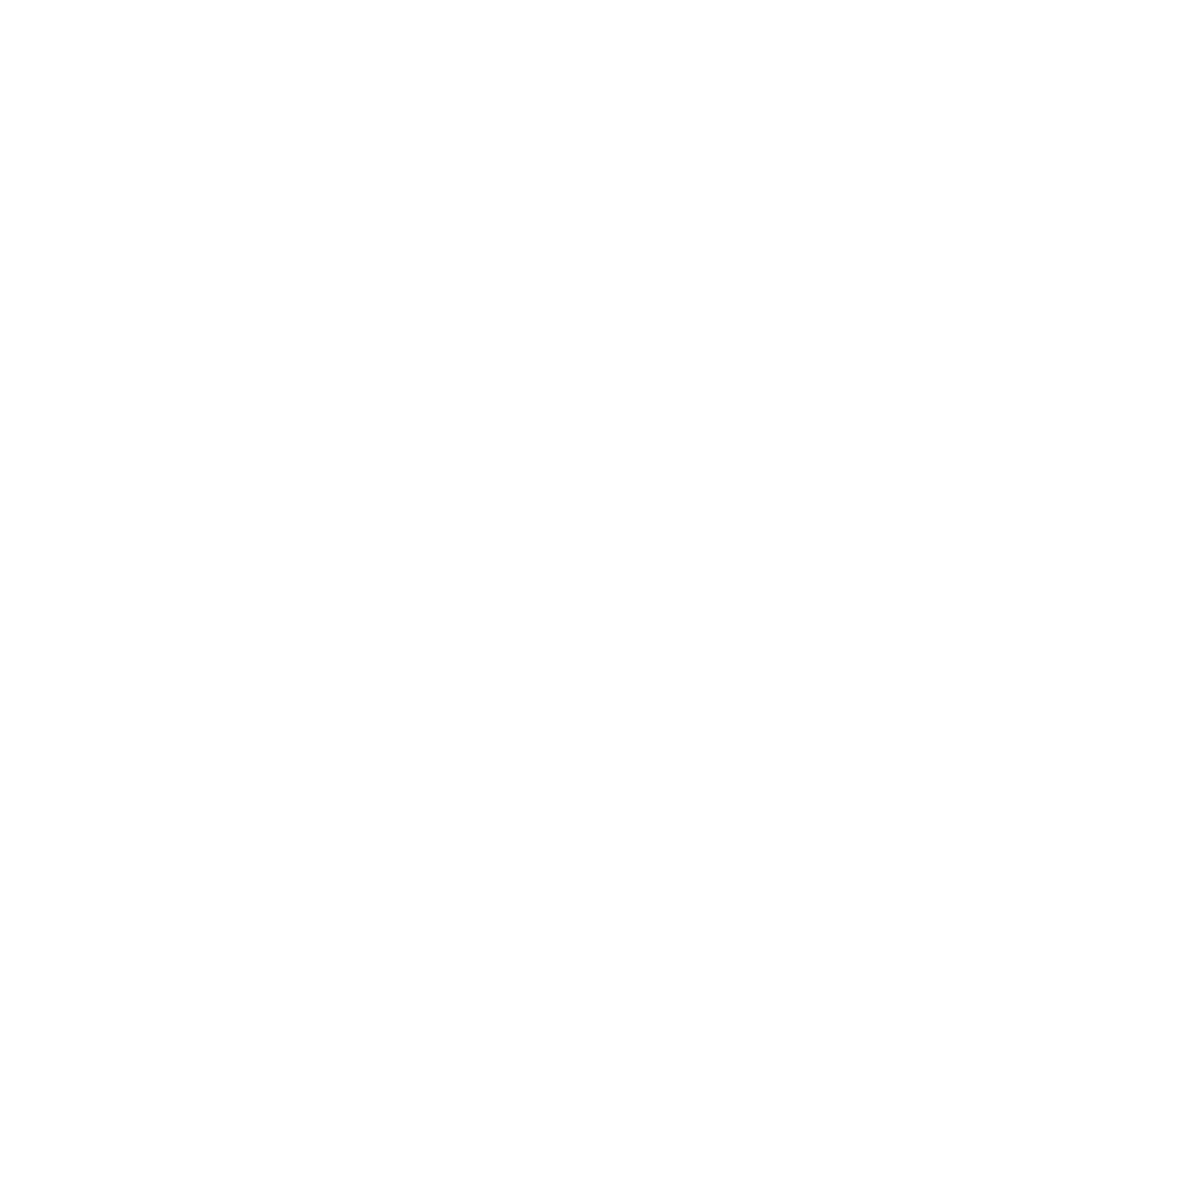

In [4]:
print(soup.prettify())

In [5]:
soup.find_all('h1')[0].text.strip()

'List of companies in India'

In [6]:
company=soup.find_all('div',class_="companyCardWrapper")

In [7]:
len(company) 

20

## webscrapping company details as follow

In [8]:
for i in soup.find_all('h2', class_='companyCardWrapper__companyName'):
  print(i.text.strip())

TCS
Accenture
Cognizant
Wipro
Capgemini
HDFC Bank
ICICI Bank
Infosys
HCLTech
Tech Mahindra
Genpact
Axis Bank
Teleperformance
Concentrix Corporation
Jio
Amazon
IBM
Reliance Retail
HDB Financial Services
Larsen & Toubro Limited


In [9]:
name=[]
rating=[]
reviews=[]
salary_data=[]
interview_data=[]
jobs_available=[]
benefits_listed=[]

for i in company:

  name.append(i.find('h2', class_='companyCardWrapper__companyName').text.strip())
  rating.append(i.find('span',class_='companyCardWrapper__companyRatingValue').text.strip())
  reviews.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[0].text.strip())
  salary_data.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[1].text.strip())
  interview_data.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[2].text.strip())
  jobs_available.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[3].text.strip())
  benefits_listed.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[4].text.strip())

In [10]:
rating=[]
for i in company:
    
 rating.append(i.find('span',class_='companyCardWrapper__companyRatingValue').text.strip())

In [11]:
reviews=[]
for i in company:
    reviews.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[0].text.strip())

In [12]:
salary_data=[]
for i in company:
    salary_data.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[1].text.strip())

In [13]:
interview_data=[]
for i in company:
    interview_data.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[2].text.strip())

In [14]:
jobs_available=[]
for i in company:
    jobs_available.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[3].text.strip())

In [15]:
benefits_listed=[]
for i in company:
    benefits_listed.append(i.find_all('span', class_='companyCardWrapper__ActionCount')[4].text.strip())

In [16]:
details = soup.find_all('span', class_='companyCardWrapper__interLinking')

# Initialize lists for each feature
company_domain = []
employee_count = []
ctype = []
how_old = []
hq = []

# # Iterate over each span element and extract the details
# for detail in details:
#     parts = [part.strip() for part in detail.get_text().strip().split('|')]
#     company_domain.append(parts[0])
#     employee_count.append(parts[1])
#     ctype.append(parts[2] if len(parts) > 3 else '')  # Handle cases with missing CType
#     how_old.append(parts[3] if len(parts) > 3 else parts[2])  # Adjust if CType is missing
#     hq.append(parts[4] if len(parts) > 4 else parts[3])  # Adjust if CType is missing


for detail in details:
    parts = [part.strip() for part in detail.get_text().strip().split('|')]
    company_domain.append(parts[0] if len(parts) > 0 else None)
    employee_count.append(parts[1] if len(parts) > 1 else None)
    ctype.append(parts[2] if len(parts) > 2 else None)
    how_old.append(parts[3] if len(parts) > 3 else None)
    hq.append(parts[4].split(' +')[0] if len(parts) > 4 else (parts[3].split(' +')[0] if len(parts) > 3 else None))

In [17]:
df = pd.DataFrame({
    'Company Name': name,
    'Industry': company_domain,
    'Employee Count': employee_count,
    'Company Type': ctype,
    'Years in Operation': how_old,
    'Headquarters': hq,
    'Rating': rating,
    'Review Count': reviews,
    'Salary Data': salary_data,
    'Interview Data': interview_data,
    'Job Openings': jobs_available,
    'Benefits': benefits_listed
})

df

,Company Name,Industry,Employee Count,Company Type,Years in Operation,Headquarters,Rating,Review Count,Salary Data,Interview Data,Job Openings,Benefits
0,TCS,IT Services & Consulting,1 Lakh+ Employees,Public,56 years old,Mumbai,3.8,74.9k,8.6L,7.6k,1.1k,11.6k
1,Accenture,IT Services & Consulting,1 Lakh+ Employees,Public,35 years old,Dublin,4.0,46.7k,5.9L,5.4k,36.4k,7.2k
2,Cognizant,IT Services & Consulting,1 Lakh+ Employees,Forbes Global 2000,30 years old,Teaneck. New Jersey.,3.9,41.9k,5.7L,4.3k,572,5.9k
3,Wipro,IT Services & Consulting,1 Lakh+ Employees,Public,79 years old,Bangalore/Bengaluru,3.8,40.3k,4.3L,4.3k,227,5.1k
4,Capgemini,IT Services & Consulting,1 Lakh+ Employees,Public,57 years old,Paris,3.8,34.5k,4.3L,3.5k,639,4.1k
5,HDFC Bank,Banking,1 Lakh+ Employees,Public,30 years old,Mumbai,4.0,33.7k,1.3L,1.8k,185,3.3k
6,ICICI Bank,Banking,1 Lakh+ Employees,Public,30 years old,Vapi,4.0,33.4k,1.4L,2.1k,30,3.8k
7,Infosys,IT Services & Consulting,1 Lakh+ Employees,Public,43 years old,Pune,3.8,32.5k,4.6L,5.7k,1.1k,5.2k
8,HCLTech,IT Services & Consulting,1 Lakh+ Employees,Public,33 years old,Noida,3.7,29.3k,3L,2.9k,206,4.1k
9,Tech Mahindra,IT Services & Consulting,1 Lakh+ Employees,Public,38 years old,Hyderabad / Secunderabad,3.7,27.7k,2.5L,2.8k,531,3.6k


In [18]:
# Saving the DataFrame to a CSV file
df.to_csv('company_data.csv', index=False)

print("DataFrame saved to company_data.csv")

DataFrame saved to company_data.csv


### If you feel my work has contributed to your knowledge, please consider giving it an upvote!

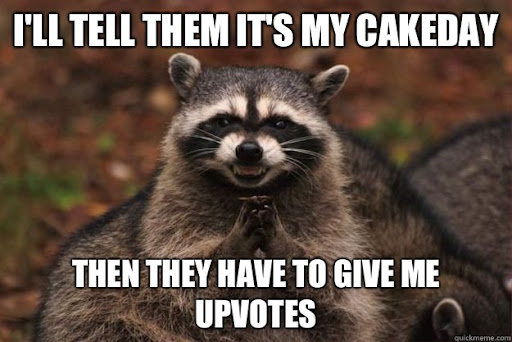